In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [2]:
path = r'/Users/yourname/Datasets'

In [3]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df_iris = pd.read_csv(os.path.join(path, 'iris.csv'), index_col = False, header=None, names=col_names)

In [4]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
#map each iris species number to a name with a dictionary.
iris_class = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}
df_iris['species_name'] = [iris_class[i] for i in df_iris.species]

In [6]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_name
0,5.1,3.5,1.4,0.2,0,Iris-setosa
1,4.9,3.0,1.4,0.2,0,Iris-setosa
2,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5.0,3.6,1.4,0.2,0,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Iris-virginica
146,6.3,2.5,5.0,1.9,2,Iris-virginica
147,6.5,3.0,5.2,2.0,2,Iris-virginica
148,6.2,3.4,5.4,2.3,2,Iris-virginica


In [7]:
#subset for plotting the petal data
columns = ['petal_length', 'petal_width', 'species_name']
df2 = df_iris[columns]

In [8]:
df2

,petal_length,petal_width,species_name
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


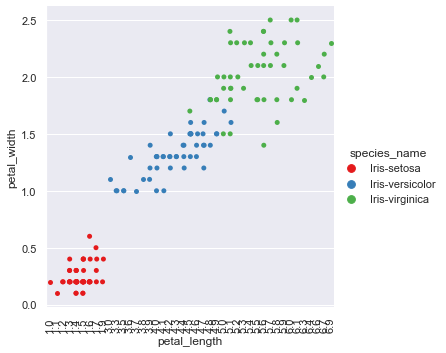

In [9]:
sns.set_theme()
g = sns.catplot(x="petal_length", y="petal_width", hue="species_name", palette='Set1', data=df2)
g.set_xticklabels(rotation=90)

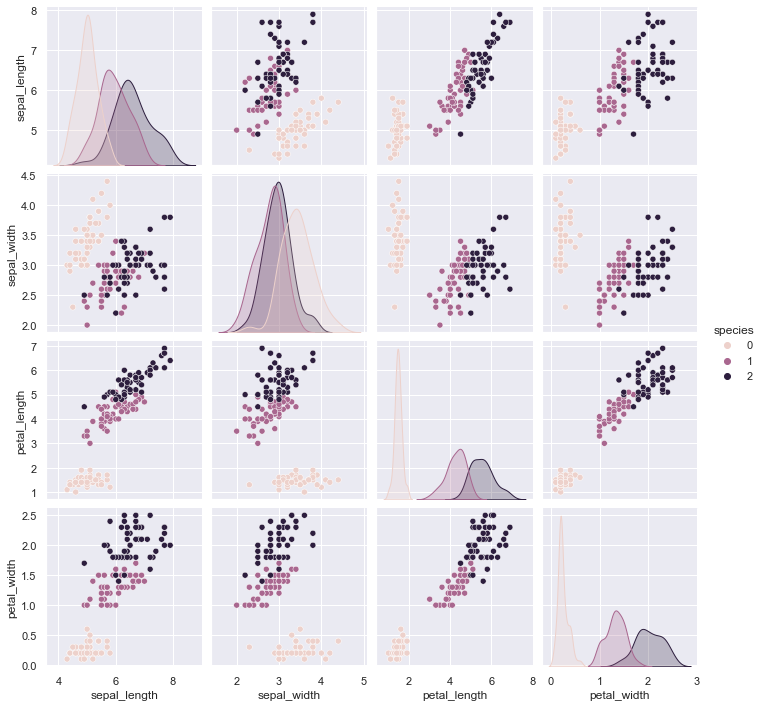

In [10]:
sns.pairplot(df_iris[['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']], hue = 'species')
plt.show()

In [11]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_iris.drop(['species', 'species_name'], axis=1)
y = df_iris.species

In [12]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [13]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


[Text(257.53846153846155, 757.1571428571428, 'X[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(193.15384615384616, 640.6714285714286, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(321.9230769230769, 640.6714285714286, 'X[2] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0, 39, 38]'),
 Text(128.76923076923077, 524.1857142857143, 'X[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(64.38461538461539, 407.7, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(193.15384615384616, 407.7, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(515.0769230769231, 524.1857142857143, 'X[3] <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(321.9230769230769, 407.7, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(257.53846153846155, 291.21428571428567, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(386.3076923076923, 291.21428571428567, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321.92

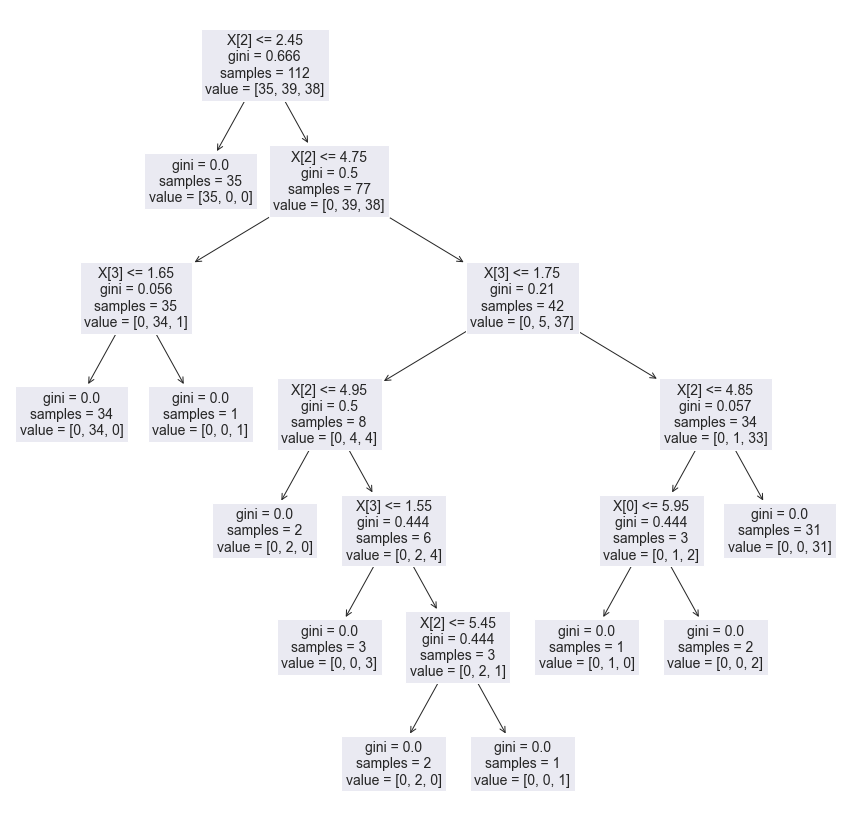

In [15]:
#Run Decision Tree classifier
iris_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
iris_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(iris_dt)

In [16]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = iris_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(iris_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.9196301564722617


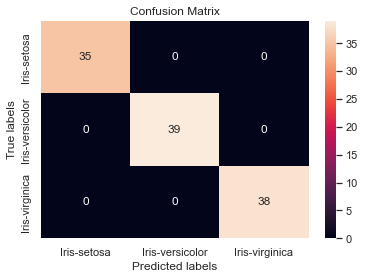

In [17]:
#Confusion matrix based on the last "k" in the sequence
labels = ['Iris-setosa','Iris-versicolor','Iris-virginica',]    

ax= plt.subplot()

cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [18]:
#What is the testing accuracy score? Using the cross validation method
y_pred = iris_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  1.0


array([[[23,  0],
        [ 0, 15]],

       [[27,  0],
        [ 0, 11]],

       [[26,  0],
        [ 0, 12]]], dtype=int64)

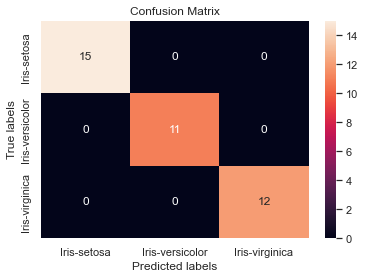

In [19]:
#Confusion matrix based on the last "k" in the sequence
labels = ['Iris-setosa','Iris-versicolor','Iris-virginica',]    

ax= plt.subplot()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);